In [1]:
import pandas_datareader as pdr
import datetime
nio = pdr.get_data_yahoo('NIO', 
                          start = datetime.datetime(2018, 9, 12),
                         end = datetime.datetime(2020, 11, 7))

In [2]:
nio.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-09-12,6.93,5.35,6.00,6.60,66849000,6.60
2018-09-13,12.69,6.52,6.62,11.60,158346500,11.60
2018-09-14,13.80,9.22,12.66,9.90,172473600,9.90
2018-09-17,9.75,8.50,9.61,8.50,56323900,8.50
2018-09-18,9.10,7.67,8.73,7.68,41827600,7.68


In [3]:
nio.tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-02,34.939999,31.680000,33.950001,33.320000,265719900,33.320000
2020-11-03,35.869999,32.779999,33.570000,35.500000,217608100,35.500000
2020-11-04,39.750000,35.820000,37.439999,37.709999,339385900,37.709999
2020-11-05,42.490002,38.250000,38.779999,42.349998,302472600,42.349998
2020-11-06,43.299999,40.049999,41.090000,41.630001,288240600,41.630001


In [4]:
nio.describe()

,High,Low,Open,Close,Volume,Adj Close
count,544.000000,544.000000,544.000000,544.000000,5.440000e+02,544.000000
mean,7.240790,6.686930,6.963585,6.980607,5.662456e+07,6.980607
std,6.621288,6.108946,6.331585,6.432081,6.790465e+07,6.432081
min,1.450000,1.190000,1.190000,1.320000,5.111000e+06,1.320000
25%,3.175000,2.997500,3.077500,3.087500,1.826788e+07,3.087500
50%,4.920000,4.590000,4.765000,4.765000,3.547515e+07,4.765000
75%,7.750000,7.260000,7.590000,7.482500,6.499420e+07,7.482500
max,43.299999,40.049999,41.090000,42.349998,5.709114e+08,42.349998


<function matplotlib.pyplot.show(*args, **kw)>

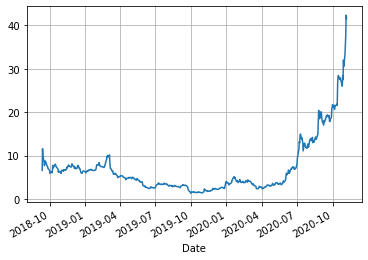

In [5]:
import matplotlib.pyplot as plt 
nio['Close'].plot(grid=True)
plt.show

In [6]:
import numpy as np 
daily_close = nio[['Adj Close']]
daily_pct_change = daily_close.pct_change()

In [7]:
daily_pct_change.fillna(0, inplace=True)
print(daily_pct_change)

            Adj Close
Date                 
2018-09-12   0.000000
2018-09-13   0.757576
2018-09-14  -0.146552
2018-09-17  -0.141414
2018-09-18  -0.096471
...               ...
2020-11-02   0.089601
2020-11-03   0.065426
2020-11-04   0.062253
2020-11-05   0.123044
2020-11-06  -0.017001

[544 rows x 1 columns]


In [8]:
daily_log_returns = np.log(daily_close.pct_change()+1)

In [9]:
print(daily_log_returns)

            Adj Close
Date                 
2018-09-12        NaN
2018-09-13   0.563935
2018-09-14  -0.158470
2018-09-17  -0.152469
2018-09-18  -0.101447
...               ...
2020-11-02   0.085812
2020-11-03   0.063375
2020-11-04   0.060393
2020-11-05   0.116043
2020-11-06  -0.017147

[544 rows x 1 columns]


In [10]:
monthly = nio.resample('BM').apply(lambda x: x[-1])

In [11]:
monthly.pct_change()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-09-28,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-31,-0.141484,-0.116766,-0.127690,-0.154728,-0.302573,-0.154728
2018-11-30,0.280000,0.301695,0.282895,0.306780,-0.277302,0.306780
2018-12-31,-0.178750,-0.191406,-0.158974,-0.173800,-0.211675,-0.173800
2019-01-31,0.200913,0.191626,0.128049,0.237049,1.449858,0.237049
2019-02-28,0.258555,0.278378,0.331081,0.214467,0.248287,0.214467
2019-03-29,-0.483384,-0.468288,-0.486294,-0.467085,-0.109790,-0.467085
2019-04-30,-0.009747,-0.045726,-0.015810,-0.049020,-0.388258,-0.049020
2019-05-31,-0.379921,-0.375000,-0.383534,-0.371134,1.728396,-0.371134


In [12]:
quarter = nio.resample('4M').mean()

In [13]:
quarter.pct_change()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-09-30,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-31,-0.221709,-0.117860,-0.169202,-0.163557,-0.705342,-0.163557
2019-05-31,-0.140376,-0.134732,-0.134224,-0.140444,1.042966,-0.140444
2019-09-30,-0.499224,-0.502145,-0.500141,-0.499701,-0.098928,-0.499701
2020-01-31,-0.136032,-0.167412,-0.157427,-0.149498,1.105923,-0.149498
2020-05-31,0.337166,0.368362,0.356071,0.352724,-0.214668,0.352724
2020-09-30,2.832017,2.805283,2.807146,2.847926,1.666945,2.847926
2021-01-31,1.094809,1.131874,1.105042,1.115382,0.166953,1.115382


In [14]:
daily_pct_change = daily_close / daily_close.shift(1) - 1

In [15]:
print(daily_pct_change)

            Adj Close
Date                 
2018-09-12        NaN
2018-09-13   0.757576
2018-09-14  -0.146552
2018-09-17  -0.141414
2018-09-18  -0.096471
...               ...
2020-11-02   0.089601
2020-11-03   0.065426
2020-11-04   0.062253
2020-11-05   0.123044
2020-11-06  -0.017001

[544 rows x 1 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f975a23f370>]],
      dtype=object)

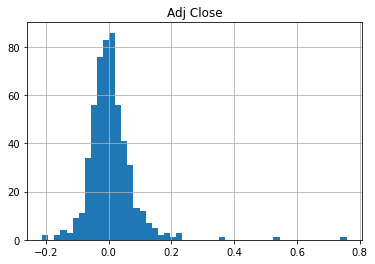

In [16]:
daily_pct_change.hist(bins=50)

In [17]:
print(daily_pct_change.describe())

        Adj Close
count  543.000000
mean     0.005754
std      0.072690
min     -0.211614
25%     -0.031371
50%     -0.002088
75%      0.032468
max      0.757576


In [18]:
cum_daily_return = (1 + daily_pct_change).cumprod()
print(cum_daily_return)

            Adj Close
Date                 
2018-09-12        NaN
2018-09-13   1.757576
2018-09-14   1.500000
2018-09-17   1.287879
2018-09-18   1.163636
...               ...
2020-11-02   5.048485
2020-11-03   5.378788
2020-11-04   5.713636
2020-11-05   6.416667
2020-11-06   6.307576

[544 rows x 1 columns]


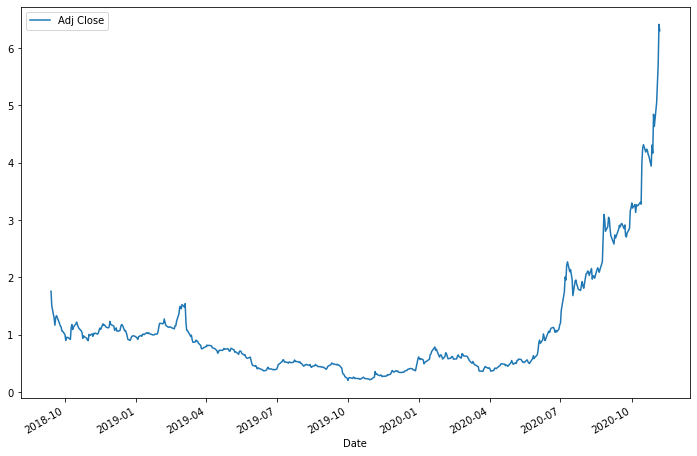

In [19]:
cum_daily_return.plot(figsize=(12,8))
plt.show()

In [20]:
cum_monthly_return = cum_daily_return.resample('M').mean()

In [21]:
print(cum_monthly_return)

            Adj Close
Date                 
2018-09-30   1.268813
2018-10-31   1.030698
2018-11-30   1.086580
2018-12-31   1.046172
2019-01-31   1.013997
2019-02-28   1.227432
2019-03-31   0.994444
2019-04-30   0.756782
2019-05-31   0.653857
2019-06-30   0.402348
2019-07-31   0.511708
2019-08-31   0.456956
2019-09-30   0.417727
2019-10-31   0.232345
2019-11-30   0.298106
2019-12-31   0.390188
2020-01-31   0.616955
2020-02-29   0.619298
2020-03-31   0.466253
2020-04-30   0.451371
2020-05-31   0.542576
2020-06-30   0.982851
2020-07-31   1.878650
2020-08-31   2.282900
2020-09-30   2.858730
2020-10-31   3.847865
2020-11-30   5.773030


In [22]:
import pandas as pd
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['TSLA', 'NIO', 'LI', 'XPEV']
all_data = get(tickers, datetime.datetime(2020, 1, 1), datetime.datetime(2020, 11, 7))

In [23]:
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f975a241820>]],
      dtype=object)

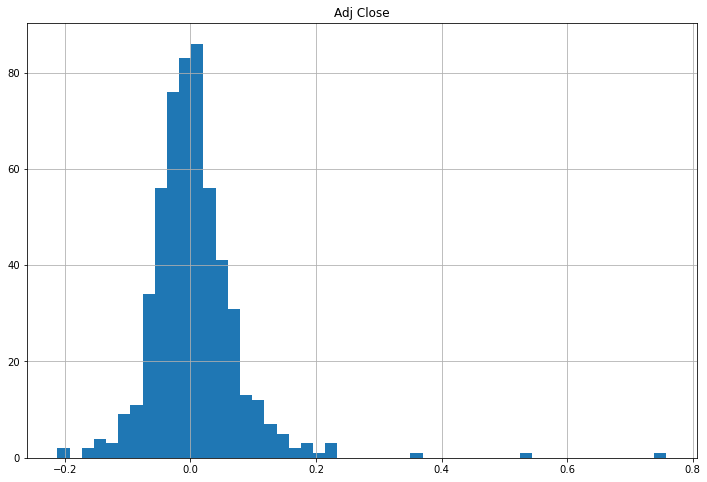

In [24]:
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

In [25]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f975a0df4c0>]],
      dtype=object)

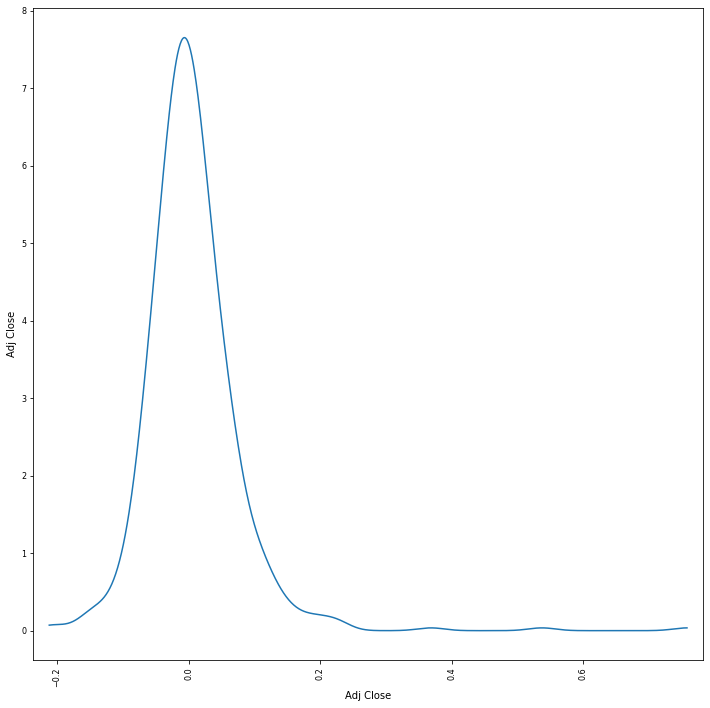

In [26]:
scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

In [27]:
adj_close_px = nio['Adj Close']

In [28]:
moving_avg = adj_close_px.rolling(window=40).mean()

In [29]:
print(moving_avg[-10:])

Date
2020-10-26    21.38600
2020-10-27    21.62125
2020-10-28    21.80600
2020-10-29    22.10825
2020-10-30    22.40525
2020-11-02    22.78875
2020-11-03    23.25050
2020-11-04    23.74100
2020-11-05    24.35625
2020-11-06    24.94775
Name: Adj Close, dtype: float64


In [30]:
nio['40'] = adj_close_px.rolling(window=40).mean()

In [31]:
nio['252'] = adj_close_px.rolling(window=252).mean()

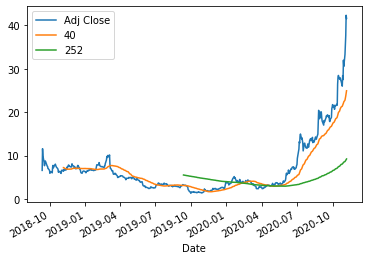

In [32]:
nio[['Adj Close', '40', '252']].plot()

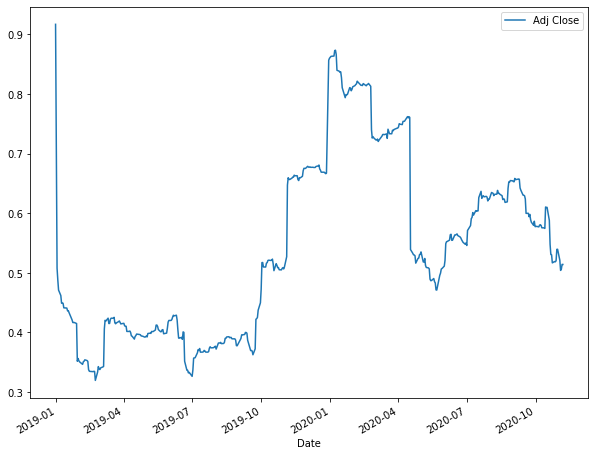

In [33]:
min_periods = 75
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods)
vol.plot(figsize=(10,8))
plt.show()

In [34]:
# Ordinary Least-Squares Regression (OLS)
from statsmodels import api as sm
from pandas import datetime
all_adj_close = all_data[['Adj Close']]
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

<ipython-input-34-1d445bf43af4>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [35]:
# Isolate the NIO returns 
nio_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'NIO']
nio_returns.index = nio_returns.index.droplevel('Ticker')

In [36]:
# Isolate the TSLA returns
tsla_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'TSLA']
tsla_returns.index = tsla_returns.index.droplevel('Ticker')

In [37]:
# Build up a new DataFrame with NIO and TSLA returns
return_data = pd.concat([nio_returns, tsla_returns], axis=1)[1:]
return_data.columns = ['NIO', 'TSLA']

In [38]:
# Add a constant and construct the model
X = sm.add_constant(return_data['NIO'])
model = sm.OLS(return_data['TSLA'],X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   TSLA   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     49.64
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           2.51e-11
Time:                        12:05:59   Log-Likelihood:                 326.32
No. Observations:                 215   AIC:                            -648.6
Df Residuals:                     213   BIC:                            -641.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0030      0.004      0.808      0.4

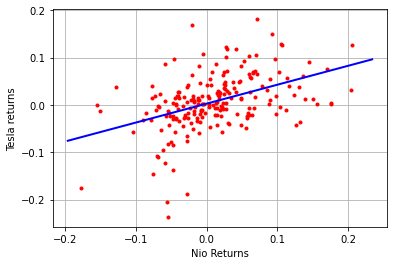

In [55]:
plt.plot(return_data['NIO'], return_data['TSLA'], 'r.')
ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('Nio Returns')
plt.ylabel('Tesla returns')
plt.show()

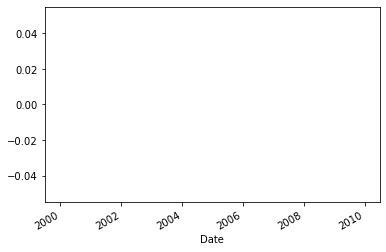

In [58]:
return_data['TSLA'].rolling(window=252).corr(return_data['NIO']).plot()
plt.show()

In [59]:
# Implementing a trading strategy using the Moving Average Crossover
short_window = 40
long_window = 100

In [60]:
signals = pd.DataFrame(index=nio.index)
signals['signal'] = 0.0

In [61]:
signals['short_mavg'] = nio['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

In [62]:
signals['long_mavg'] = nio['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

In [63]:
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

In [64]:
signals['positions'] = signals['signal'].diff()
print(signals)

            signal  short_mavg  long_mavg  positions
Date                                                
2018-09-12     0.0    6.600000   6.600000        NaN
2018-09-13     0.0    9.100000   9.100000        0.0
2018-09-14     0.0    9.366667   9.366667        0.0
2018-09-17     0.0    9.150000   9.150000        0.0
2018-09-18     0.0    8.856000   8.856000        0.0
...            ...         ...        ...        ...
2020-11-02     1.0   22.788750  16.691700        0.0
2020-11-03     1.0   23.250500  16.985700        0.0
2020-11-04     1.0   23.741000  17.294500        0.0
2020-11-05     1.0   24.356250  17.648100        0.0
2020-11-06     1.0   24.947750  17.996000        0.0

[544 rows x 4 columns]


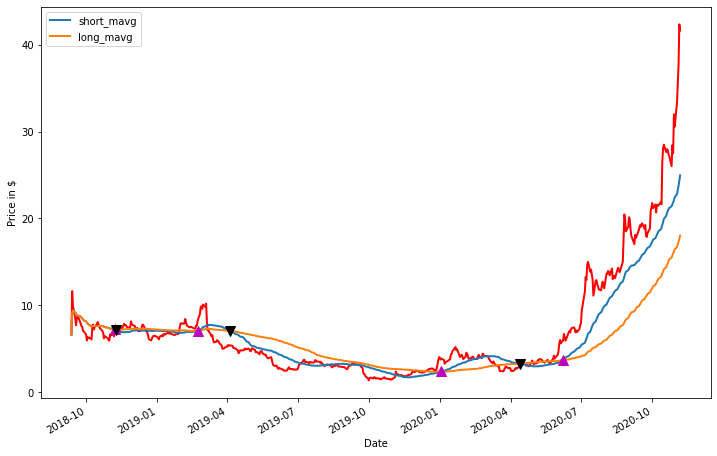

In [70]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111, ylabel='Price in $')
nio['Close'].plot(ax=ax1, color='r', lw=2)
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')

plt.show()

In [71]:
# Backtesting by paper trading 
initial_capital= float(100000.0)
positions = pd.DataFrame(index=signals.index).fillna(0.0)
positions['NIO'] = 100 * signals['signal']

In [73]:
portfolio = positions.multiply(nio['Adj Close'], axis=0)

In [74]:
pos_diff = positions.diff()

In [75]:
portfolio['holdings'] = (positions.multiply(nio['Adj Close'], axis=0)).sum(axis=1)

In [76]:
portfolio['cash'] = initial_capital - (pos_diff.multiply(nio['Adj Close'], axis=0)).sum(axis=1).cumsum()   

In [77]:
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

In [78]:
portfolio['returns'] = portfolio['total'].pct_change()

In [79]:
print(portfolio.head())

            NIO  holdings      cash     total  returns
Date                                                  
2018-09-12  0.0       0.0  100000.0  100000.0      NaN
2018-09-13  0.0       0.0  100000.0  100000.0      0.0
2018-09-14  0.0       0.0  100000.0  100000.0      0.0
2018-09-17  0.0       0.0  100000.0  100000.0      0.0
2018-09-18  0.0       0.0  100000.0  100000.0      0.0


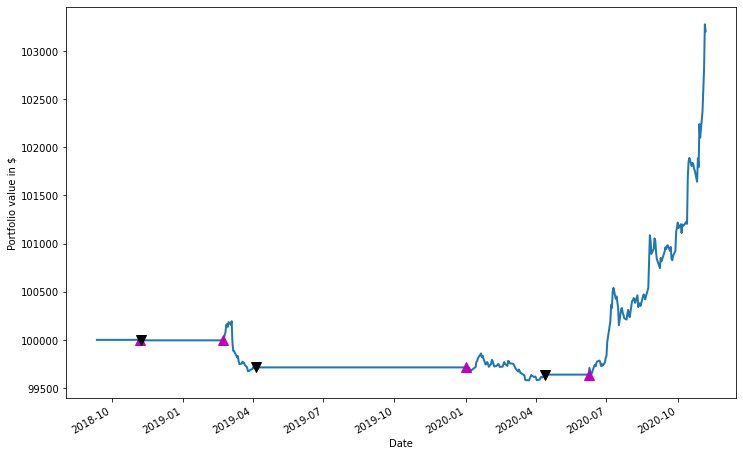

In [82]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

plt.show()

In [86]:
returns = portfolio['returns']
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())
print(sharpe_ratio)

1.6605536158792018


In [87]:
window = 252

# Calculate the max drawdown in the past window days for each day 
rolling_max = nio['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = nio['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

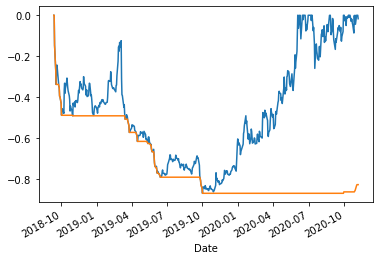

In [88]:
daily_drawdown.plot()
max_daily_drawdown.plot()
plt.show()

In [89]:
# Use CAGR ((EV/BV)1/n−1) to find the constant rate of return 
days = (nio.index[-1] - nio.index[0]).days

# Calculate the CAGR 
cagr = ((((nio['Adj Close'][-1]) / nio['Adj Close'][1])) ** (365.0/days)) - 1

# Print the CAGR
print(cagr)

0.8101103615583578
